In [12]:
import json, os, random
import numpy as np
from collections import Counter
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
WebQA_train_val = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_train_val.json", "r"))
print(Counter([WebQA_train_val[g]['split'] for g in WebQA_train_val]))
print(Counter([WebQA_train_val[g]['Qcate'] for g in WebQA_train_val]))
print(len(set([WebQA_train_val[g]['Guid'] for g in WebQA_train_val])))
print(Counter([len(WebQA_train_val[g]['img_posFacts']) for g in WebQA_train_val]))
print(Counter([len(WebQA_train_val[g]['txt_posFacts']) for g in WebQA_train_val]))
print(Counter([len(WebQA_train_val[g]['img_negFacts']) for g in WebQA_train_val]))
print(Counter([len(WebQA_train_val[g]['txt_negFacts']) for g in WebQA_train_val]))
for g in tqdm(WebQA_train_val):
    assert g == WebQA_train_val[g]['Guid']
    assert len(WebQA_train_val[g]['A']) == 1
    
    # No dummy fields
    assert set(WebQA_train_val[g].keys()) == set(['Q', 'A', 'split', 'Guid', 'img_posFacts', 'img_negFacts', 'txt_posFacts', 'txt_negFacts', 'Qcate', 'topic'])
    for im in WebQA_train_val[g]['img_posFacts']: 
        assert len(list(im.keys())) == 5
    for im in WebQA_train_val[g]['img_negFacts']: 
        assert len(list(im.keys())) == 5
    for im in WebQA_train_val[g]['txt_posFacts']: 
        assert len(list(im.keys())) == 4
        assert g in im['snippet_id']
    for im in WebQA_train_val[g]['txt_negFacts']: 
        assert len(list(im.keys())) == 4
        assert g in im['snippet_id']
    # All image_ids, snippet_ids, snippets are unique within each sample
    x = len(set([f['image_id'] for f in WebQA_train_val[g]['img_posFacts']+WebQA_train_val[g]['img_negFacts']])) - len(WebQA_train_val[g]['img_posFacts']+WebQA_train_val[g]['img_negFacts'])
    y = len(set([f['snippet_id'] for f in WebQA_train_val[g]['txt_posFacts']+WebQA_train_val[g]['txt_negFacts']])) - len(WebQA_train_val[g]['txt_posFacts']+WebQA_train_val[g]['txt_negFacts'])
    z = len(set([f['fact'] for f in WebQA_train_val[g]['txt_posFacts']+WebQA_train_val[g]['txt_negFacts']])) - len(WebQA_train_val[g]['txt_posFacts']+WebQA_train_val[g]['txt_negFacts'])
    assert x == y == z == 0

Counter({'train': 36766, 'val': 4966})
Counter({'text': 20267, 'YesNo': 7320, 'Others': 5412, 'choose': 4220, 'number': 2118, 'color': 1830, 'shape': 565})
41732
Counter({0: 20267, 1: 12027, 2: 9438})
Counter({0: 21465, 2: 19452, 3: 700, 1: 79, 4: 35, 5: 1})
Counter({16: 27059, 15: 3155, 14: 1613, 13: 1579, 6: 768, 5: 767, 12: 737, 7: 700, 9: 673, 11: 672, 1: 662, 3: 623, 8: 620, 2: 611, 10: 595, 4: 588, 0: 310})


  7%|▋         | 2811/41732 [00:00<00:01, 28105.54it/s]

Counter({16: 35681, 8: 520, 13: 501, 10: 500, 7: 491, 9: 488, 12: 480, 15: 479, 6: 471, 11: 469, 5: 468, 14: 452, 4: 267, 3: 136, 0: 125, 1: 110, 2: 94})


100%|██████████| 41732/41732 [00:01<00:00, 30871.63it/s]


In [3]:
WebQA_test = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_test.json", "r"))
print(Counter([WebQA_test[g]['split'] for g in WebQA_test]))
print(len(set([WebQA_test[g]['Guid'] for g in WebQA_test])))
print(Counter([len(WebQA_test[g]['img_Facts']) for g in WebQA_test]))
print(Counter([len(WebQA_test[g]['txt_Facts']) for g in WebQA_test]))

for g in tqdm(WebQA_test):
    assert g == WebQA_test[g]['Guid']
    
    # No dummy fields
    assert set(WebQA_test[g].keys()) == set(['Q', 'A', 'split', 'Guid', 'img_Facts', 'txt_Facts'])
    assert len(WebQA_test[g]['A']) == 1 and len(WebQA_test[g]['A'][0]) == 0
    for im in WebQA_test[g]['img_Facts']: 
        assert len(list(im.keys())) == 5
    for im in WebQA_test[g]['txt_Facts']: 
        assert len(list(im.keys())) == 4
        assert g in im['snippet_id']
    # All image_ids, snippet_ids, snippets are unique within each sample
    x = len(set([f['image_id'] for f in WebQA_test[g]['img_Facts']])) - len(WebQA_test[g]['img_Facts'])
    y = len(set([f['snippet_id'] for f in WebQA_test[g]['txt_Facts']])) - len(WebQA_test[g]['txt_Facts'])
    z = len(set([f['fact'] for f in WebQA_test[g]['txt_Facts']])) - len(WebQA_test[g]['txt_Facts'])
    assert x == y == z == 0

 40%|████      | 3032/7540 [00:00<00:00, 30310.35it/s]

Counter({'test': 7540})
7540
Counter({17: 1810, 18: 1499, 16: 1336, 15: 624, 14: 410, 13: 213, 5: 167, 12: 145, 8: 143, 1: 142, 11: 135, 2: 133, 3: 128, 7: 126, 10: 123, 6: 121, 4: 121, 9: 112, 0: 52})
Counter({16: 3244, 18: 3092, 13: 110, 10: 103, 12: 98, 15: 95, 11: 91, 14: 91, 8: 90, 17: 87, 9: 86, 19: 81, 7: 79, 6: 63, 0: 24, 2: 24, 4: 23, 1: 21, 3: 18, 5: 17, 20: 3})


100%|██████████| 7540/7540 [00:00<00:00, 31937.08it/s]


In [4]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [5]:
dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_0904_concat_newimgid_newguid.json", "r"))
print(len(dataset))

49272


Q_txt_data 24343
A_txt_data 40153
Q_img_data 24929
A_img_data 38857
Q_txt_data 24.35410590313437 9.593644956079919
A_txt_data 15.775060393992977 14.363007224350644
Q_img_data 23.55954911949938 7.447054212504771
A_img_data 21.124868106132745 7.86349972935998


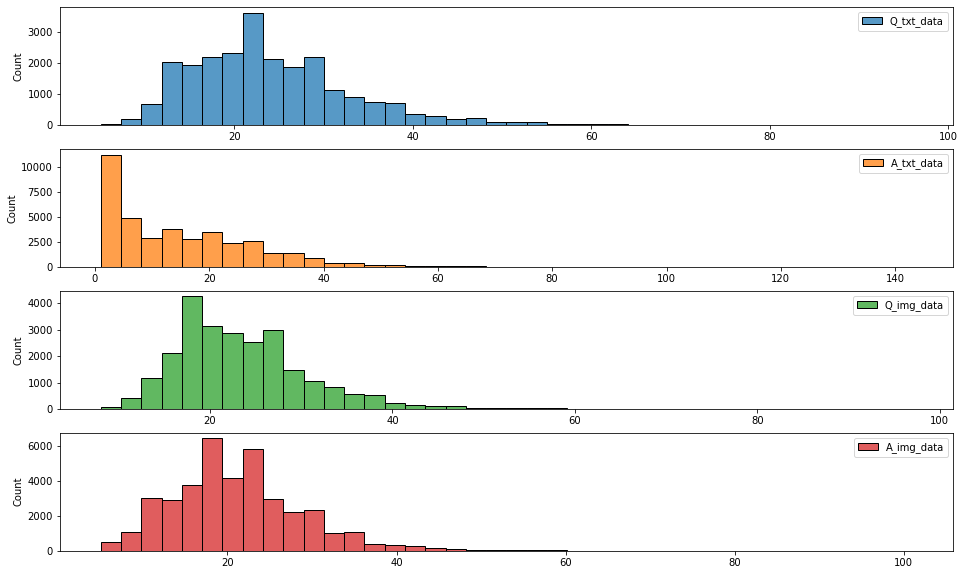

In [6]:
snippet_lengths = {'Q_txt_data': [], 'A_txt_data': [], 'Q_img_data': [], 'A_img_data': []}
for k in dataset:
    if dataset[k]['Qcate'] == 'text':
        snippet_lengths['Q_txt_data'].append(len(tokenizer.tokenize(dataset[k]['Q'])))
        snippet_lengths['A_txt_data'].extend([len(tokenizer.tokenize(a)) for a in dataset[k]['A']])
    else:
        snippet_lengths['Q_img_data'].append(len(tokenizer.tokenize(dataset[k]['Q'])))
        snippet_lengths['A_img_data'].extend([len(tokenizer.tokenize(a)) for a in dataset[k]['A']])
        
for k in snippet_lengths:
    print(k, len(snippet_lengths[k]))
for k in snippet_lengths:
    print(k, np.mean(snippet_lengths[k]), np.std(snippet_lengths[k]))
    
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(4, 1, sharex=False, figsize=(16,10))
for i, k, color in zip(range(4), list(snippet_lengths.keys()), colors[:4]):
    ax = axes[i]
    #ax.set(yscale="log")
    sns.histplot(snippet_lengths[k], ax=ax, kde=False, bins=40, label=k, color=color)
    ax.legend()

In [7]:
print("\nImg data, num(img_posFacts): ")
x = [len(dataset[k]['img_posFacts']) for k in dataset if not dataset[k]['Qcate'] == 'text']
print(Counter(x))
print(np.mean(x), np.max(x), np.min(x))

print("\nImg data, num(img_negFacts): ")
x = [len(dataset[k]['img_negFacts']) for k in dataset if not dataset[k]['Qcate'] == 'text']
print(Counter(x))
print(np.mean(x), np.max(x), np.min(x))

print("\nImg data, num(txt_negFacts): ")
x = [len(dataset[k]['txt_negFacts']) for k in dataset if not dataset[k]['Qcate'] == 'text']
print(Counter(x))
print(np.sum(x))
print(np.mean(x), np.max(x), np.min(x))


Img data, num(img_posFacts): 
Counter({1: 13988, 2: 10941})
1.4388864374824502 2 1

Img data, num(img_negFacts): 
Counter({16: 23785, 13: 774, 12: 115, 15: 84, 14: 78, 11: 68, 7: 14, 9: 4, 10: 4, 8: 3})
15.857033976493241 16 7

Img data, num(txt_negFacts): 
Counter({16: 22918, 0: 149, 13: 141, 15: 137, 14: 136, 12: 136, 1: 131, 10: 129, 6: 129, 8: 128, 11: 127, 5: 118, 2: 116, 7: 113, 9: 109, 3: 106, 4: 106})
382064
15.326086084479924 16 0


In [8]:
print("\ntxt data, num(txt_posFacts): ")
x = [len(dataset[k]['txt_posFacts']) for k in dataset if dataset[k]['Qcate'] == 'text']
print(Counter(x))
print(np.mean(x), np.max(x), np.min(x))

print("\ntxt data, num(img_negFacts): ")
x = [len(dataset[k]['img_negFacts']) for k in dataset if dataset[k]['Qcate'] == 'text']
print(Counter(x))
print(np.mean(x), np.max(x), np.min(x))

print("\ntxt data, num(txt_negFacts): ")
x = [len(dataset[k]['txt_negFacts']) for k in dataset if dataset[k]['Qcate'] == 'text']
print(Counter(x))
print(np.sum(x))
print(np.mean(x), np.max(x), np.min(x))


txt data, num(txt_posFacts): 
Counter({2: 23383, 3: 832, 1: 85, 4: 42, 5: 1})
2.034260362321817 5 1

txt data, num(img_negFacts): 
Counter({16: 7910, 15: 3693, 14: 1851, 13: 1102, 5: 934, 6: 889, 7: 813, 1: 804, 9: 781, 12: 777, 8: 759, 3: 751, 11: 749, 2: 744, 10: 715, 4: 709, 0: 362})
11.629010393131496 16 0

txt data, num(txt_negFacts): 
Counter({16: 19105, 10: 482, 8: 479, 7: 472, 9: 467, 13: 465, 11: 442, 12: 438, 6: 438, 15: 434, 5: 427, 14: 412, 4: 226, 3: 54, 2: 2})
356113
14.628969313560367 16 2


pos_imgs 35870
neg_imgs_for_img 395300
neg_imgs_for_txt 283085
pos_imgs 23.829383886255926 17.65052419741056
neg_imgs_for_img 23.726104224639514 18.630041650139287
neg_imgs_for_txt 22.470063761767666 22.020285512165824


'\npos_imgs 35870\nneg_imgs_for_img 395300\nneg_imgs_for_txt 297048\npos_imgs 23.829383886255926 17.65052419741056\nneg_imgs_for_img 23.726104224639514 18.630041650139287\nneg_imgs_for_txt 22.485931566615495 21.951410201154395\n'

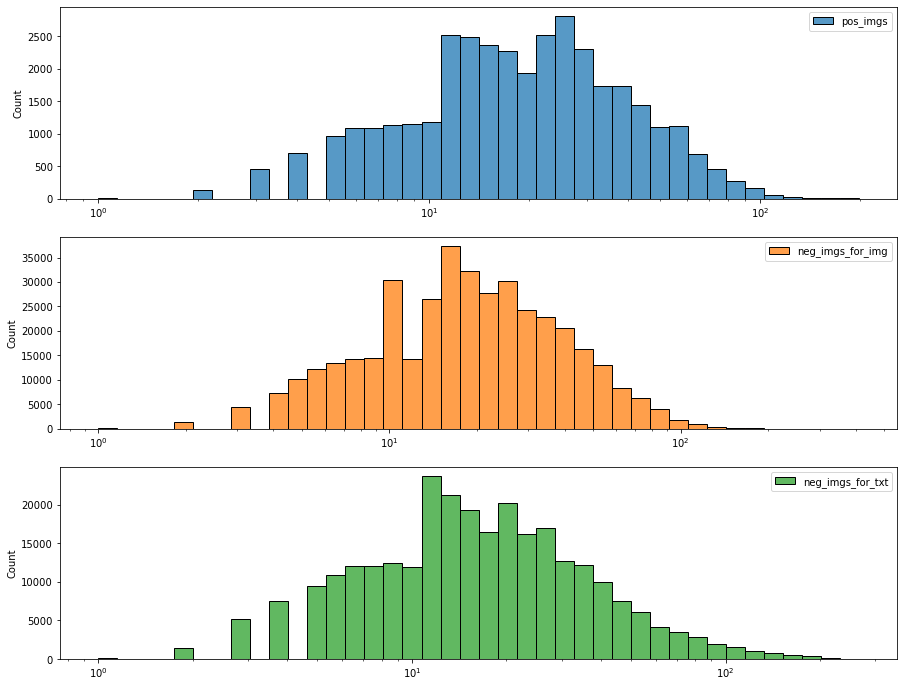

In [9]:
### Comparison of length distribution of img captions: 
# with pos imgs || with neg imgs for img data || with neg imgs for txt data
cap_lengths = {'pos_imgs': [], 'neg_imgs_for_img': [], 'neg_imgs_for_txt': []}
for k in dataset:
    if dataset[k]['Qcate'] == 'text': continue
    for i in dataset[k]['img_posFacts']:
        cap_lengths['pos_imgs'].append(len(tokenizer.tokenize(i['caption'].strip())))
    for i in dataset[k]['img_negFacts']:
        cap_lengths['neg_imgs_for_img'].append(len(tokenizer.tokenize(i['caption'].strip())))
for k in dataset:
    if not dataset[k]['Qcate'] == 'text': continue
    for i in dataset[k]['img_negFacts']:
        cap_lengths['neg_imgs_for_txt'].append(len(tokenizer.tokenize(i['caption'].strip())))
        
for k in cap_lengths:
    print(k, len(cap_lengths[k]))
for k in cap_lengths:
    print(k, np.mean(cap_lengths[k]), np.std(cap_lengths[k]))

colors = sns.color_palette("tab10")
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(15,12))
for i, k, color in zip(range(3), list(cap_lengths.keys()), colors[:3]):
    ax = axes[i]
    ax.set(xscale="log")
    sns.histplot(cap_lengths[k], ax=ax, kde=False, bins=40, label=k, color=color)
    ax.legend()

'''
pos_imgs 35870
neg_imgs_for_img 395300
neg_imgs_for_txt 297048
pos_imgs 23.829383886255926 17.65052419741056
neg_imgs_for_img 23.726104224639514 18.630041650139287
neg_imgs_for_txt 22.485931566615495 21.951410201154395
'''

pos_snippets 49520
neg_snippets_for_img 382064
neg_snippets_for_txt 356113
pos_snippets 65.21625605815832 19.354280893146495
neg_snippets_for_img 49.76232254282005 15.325313181559885
neg_snippets_for_txt 53.71820742292475 17.59979268100552


'\npos_snippets 49628\nneg_snippets_for_img 343674\nneg_snippets_for_txt 356117\npos_snippets 65.21256145724188 19.347038651791905\nneg_snippets_for_img 49.76683426735802 15.334392825559785\nneg_snippets_for_txt 53.71806456866704 17.5997685882277\n'

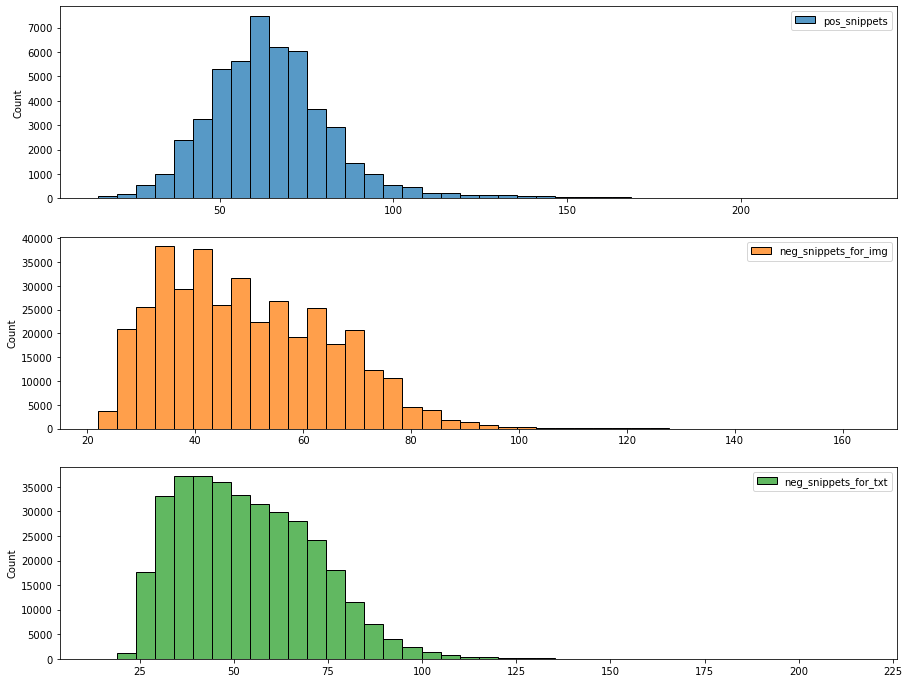

In [10]:
### Comparison of length distribution of snippets: 
# with pos snippets || with neg snippets for img data || with neg snippets for txt data
snippet_lengths = {'pos_snippets': [], 'neg_snippets_for_img': [], 'neg_snippets_for_txt': []}
for k in dataset:
    if not dataset[k]['Qcate'] == 'text': continue
    for f in dataset[k]['txt_posFacts']:
        snippet_lengths['pos_snippets'].append(len(tokenizer.tokenize(f['fact'])))
    for f in dataset[k]['txt_negFacts']:
        snippet_lengths['neg_snippets_for_txt'].append(len(tokenizer.tokenize(f['fact'])))
for k in dataset:
    if dataset[k]['Qcate'] == 'text': continue
    for f in dataset[k]['txt_negFacts']:
        snippet_lengths['neg_snippets_for_img'].append(len(tokenizer.tokenize(f['fact'])))
        
for k in snippet_lengths:
    print(k, len(snippet_lengths[k]))
for k in snippet_lengths:
    print(k, np.mean(snippet_lengths[k]), np.std(snippet_lengths[k]))
    
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(15,12))
for i, k, color in zip(range(3), list(snippet_lengths.keys()), colors[:3]):
    ax = axes[i]
    #ax.set(yscale="log")
    sns.histplot(snippet_lengths[k], ax=ax, kde=False, bins=40, label=k, color=color)
    ax.legend()
    
'''
pos_snippets 49628
neg_snippets_for_img 343674
neg_snippets_for_txt 356117
pos_snippets 65.21256145724188 19.347038651791905
neg_snippets_for_img 49.76683426735802 15.334392825559785
neg_snippets_for_txt 53.71806456866704 17.5997685882277
'''

In [13]:
### Check img ids all exist
### All img ids can map back to image_id_map_0904
image_id_map = pickle.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/image_id_map_0904.pkl", "rb"))
imid_new2old = dict([(v, k) for k, v in image_id_map.items()])
print(len(imid_new2old))

389750


In [14]:
with open("/data/yingshac/MMMHQA/base64_0904/imgs.lineidx", "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]
print(len(lineidx))

389750


In [19]:
for g in WebQA_test:
    for im in WebQA_test[g]['img_Facts']:
        assert type(im['image_id']) == int and len(str(im['image_id'])) == 8
        assert im['image_id'] in range(30000000, 30000000+len(lineidx))
        assert im['image_id'] in imid_new2old
for g in WebQA_train_val:    
    for im in WebQA_train_val[g]['img_posFacts'] + WebQA_train_val[g]['img_negFacts']:
        assert type(im['image_id']) == int and len(str(im['image_id'])) == 8
        assert im['image_id'] in range(30000000, 30000000+len(lineidx))
        assert im['image_id'] in imid_new2old
print("Done!")       

Done!
